<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/DS251_TUTORIAL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Assignment link](https://cdn-uploads.piazza.com/paste/l6w1bx8r3hy6df/4999a7f860fb45a91cf68bb7a13bea35591e5875abfbe4789df568d8f23ba802/Assignment4.pdf)  
# <FONT color="pink">QUESTION-1</FONT>  


In [44]:
import pandas as pd
import numpy as np
import numpy as np
from scipy import stats
from scipy.stats import norm, t

## Explaination

### **Background**

We're exploring a random sample $X_{1},X_{2},\dots,X_{n}$ derived from a Poisson distribution characterized by parameter $\theta$. Each sample's behavior is encapsulated by a probability mass function (pmf), elegantly defined as:

$$
f(x_{i};\theta) = \frac{\theta^{x_i} e^{-\theta}}{x_{i}!}, \quad x_{i} = 0,1,2,\dots
$$

The likelihood function orchestrating our analysis is a testament to its elegance:

$$
L(\theta; x_1, x_2, \dots, x_{n}) = \frac{e^{-n\theta}\,\theta^{\sum_{i=1}^{n}x_i}}{\prod_{i=1}^{n} (x_i!)}
$$

### **Hypothesis Testing**

Our journey embarks on testing two contrasting hypotheses:

- The Null Hypothesis ($H_{\circ}$): Assuming $\theta = 0.2$
- The Alternative Hypothesis ($H_{1}$): Believing $\theta = 0.6$

### **Neyman-Pearson Approach**

We invoke the Neyman-Pearson theorem, an illustrious guide enabling the crafting of the most potent test at any significance level.

The theorem exhorts that for a critical region $C$, the ratio of likelihoods must uphold:

$$
\frac{L(\theta = 0.2;\overrightarrow{x})}{L(\theta = 0.6;\overrightarrow x)} \leq k
$$

where $k$ mirrors our chosen significance level.

### **Deriving the Critical Region**

With dexterity, we substitute expressions for likelihoods, unwinding a web of equations:

$$
\frac{\frac{e^{-n(0.2)}\,(0.2)^{\sum_{i=1}^{n}x_{i}}}{\prod_{i=1}^{n} (x_i!)}}{\frac{e^{-n(0.6)}\,(0.6)^{\sum_{i=1}^{n}x_i}}{\prod_{i=1}^{n} (x_i!)}} \leq k
$$

This condenses to:

$$
e^{n(0.4)} \cdot \left(\frac{1}{3}\right)^{\sum_{i=1}^{n}x_{i}} \leq k
$$

$$
3^{\sum_{i=1}^{n}x_{i}} \geq \frac{e^{0.4n}}{k}
$$

$$
\sum_{i=1}^{n}x_{i} \geq \frac{0.4n-\ln(k)}{\ln(3)}
$$

### **Best Critical Region Selection**

Our path forward is illuminated by the significance of $n$. As we set $n=10$, a revelation emerges:

$$
\sum_{i=1}^{n}x_{i} \geq 3
$$

Thus, irrespective of $k$, if the sum of observed values $x_i$ in our sample towers at 3 or beyond, we bid adieu to the null hypothesis $H_{\circ}$, embracing the vibrant alternative $H_{1}$.

This ensures a test of unparalleled potency, capable of discerning truth from conjecture.


---
### **Theoretical Analysis**

**Expected Group Mean**

Begin by understanding the expected mean for $\sum_{i=1}^{n}x_{i}$, calculated as $n\theta$. Assuming $n=10$, the group mean at $\theta = 0.2$ is $\lambda = 10 \times 0.2 = 2$.

---


**Significance Level Calculation**

Delve into the significance level ($\alpha$) calculation, a crucial aspect of hypothesis testing, indicating the probability of committing a Type I error.

---


$\begin{aligned}
\alpha & \quad \Longrightarrow \quad \gamma_C(\theta=0.2) \\
& \quad \Longrightarrow \quad P_{\{\theta=0.6\}}(\overrightarrow x \in C) \\
& \quad \Longrightarrow \quad P_{\{\theta=0.2\}}\left(\sum_{i=1}^{10} x_i \geq 3\right) \\
& \quad \Longrightarrow \quad P(x_i \geq 3) \\
& \quad \Longrightarrow \quad 1 - P(x_i < 3) \\
& \quad \Longrightarrow \quad 1 - (P(x = 0) + P(x = 1) + P(x = 2)) \\
& \quad \Longrightarrow \quad 1 - e^{-2}\left(\frac{2^0}{0!} + \frac{2^1}{1!} + \frac{2^2}{2!}\right) \\
& \quad \Longrightarrow \quad 0.32332
\end{aligned}$



---

### **Further Analysis**

**Group Mean at $\theta = 0.6$**

Let's recalibrate our compass to explore the group mean at $\theta = 0.6$, unfolding as $\lambda = 10 \times 0.6 = 6$.

---

**Calculation of Test Power at $\theta = 0.6$**

Prepare to navigate the intricate currents of test power calculation at $\theta = 0.6$, a beacon guiding us through the labyrinth of hypothesis testing, revealing the probability of distinguishing a true alternative hypothesis.

$\begin{aligned}
\gamma_{C}(\theta = 0.6) & \quad \Longrightarrow \quad P_{\{\theta=0.6\}}(\overrightarrow x \in C) \\
& \quad \Longrightarrow \quad P_{\{\theta=0.6\}}\left(\sum_{i=1}^{10} x_i \geq 3\right) \\
& \quad \Longrightarrow \quad P(x_i \geq 3) \\
& \quad \Longrightarrow \quad 1 - P(x_i < 3) \\
& \quad \Longrightarrow \quad 1 - (P(x = 0) + P(x = 1) + P(x = 2)) \\
& \quad \Longrightarrow \quad 1 - e^{-6}\left(\frac{6^0}{0!} + \frac{6^1}{1!} + \frac{6^2}{2!}\right) \\
& \quad \Longrightarrow \quad 0.93803
\end{aligned}$


## Part-a
### Generate a random sample of size 10000 from a Poisson distribution with mean θ.


In [48]:
import random
import math
def random_poisson_mult(Lambda , size):
    uniform = np.random.uniform(0,0.95,size)
    poisson = []

    for u in uniform:
        k = 0
        p = np.exp(-Lambda)
        CDF = p
        while(CDF < u):
            k += 1
            p *= Lambda / k
            CDF += p
        poisson.append(k)

    return np.array(poisson)

## Part-B
#### Defining the e the critical region C as the sum of the sample being greater than or equal to 3

In [49]:
def calculate_critical_region(sample):
    """
    Calculates the critical region C defined by P10000 i=1 Xi ≥ 3.
    """
    return np.sum(sample) >= 3


## Part-C
#### Hypothesis testing by comparing the critical region with the significance level α

In [50]:
def crticial_test(sample):
    return sum(sample)>=3

In [51]:
def calculate_power_of_test(theta, sample_size=10000, sim=1000):
    return sum(calculate_critical_region(random_poisson_mult(theta, sample_size)) for _ in range(sim)) / sim

# Define the null and alternative hypotheses
null_hypothesis_theta = 0.2
alternative_hypothesis_theta = 0.6

# Calculate the significance level for the null hypothesis
significance_level = calculate_power_of_test(null_hypothesis_theta, sample_size=10)

In [52]:
class colors:
    GREEN = '\033[92m'
    RED = '\033[91m'
    END = '\033[0m'

In [53]:
# Print the significance level calculation result
print("\nSignificance Level Calculation:")
print(f"\nSignificance Level for the Null Hypothesis (θ = {null_hypothesis_theta}): {significance_level:.4f}")

# Interpretation of the result
print("\nInterpretation:")
if significance_level < 0.2:
    print("    The significance level is less than the theoretical alpha (0.2).")
    print(f"    {colors.RED}Conclusion: We reject the null hypothesis.{colors.END}")
else:
    print("    The significance level is greater than or equal to the theoretical alpha (0.2).")
    print(f"    {colors.GREEN}Conclusion: We fail to reject the null hypothesis.{colors.END}")



Significance Level Calculation:

Significance Level for the Null Hypothesis (θ = 0.2): 0.1490

Interpretation:
    The significance level is less than the theoretical alpha (0.2).
    Conclusion: We reject the null hypothesis.


# Question-B

## Explaination

---

### **Hypothesis Testing for Gaussian Distribution**

We embark on a journey through the realm of hypothesis testing, where our quest leads us to scrutinize a random sample $X_{1},X_{2},\dots,X_{100}$ drawn from a Gaussian distribution. Each $X_i$ is governed by the following probability density function (pdf):

$$
f(x_i) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^2}
$$


Likelihood of the Sample
The likelihood of our sample, denoted by $L(\mu;\overrightarrow x)$, is a beacon guiding us through the labyrinth of hypothesis testing. It's eloquently expressed as:

$$
L(\mu;\overrightarrow x) = \left(\frac{1}{\sqrt{2\pi}\sigma}\right)^{100} e^{-\frac{1}{2}\sum_{i=1}^{100}\left(\frac{x_i-\mu}{\sigma}\right)^2}
$$


Testing Hypotheses
Employing the same method as in Question 1, we embark on testing hypothesis $H_{\circ}:\mu=15$ against $H_1:\mu=18$. Assuming for some $k\ge0$, we derive the following expression:

$$
\frac{L(\mu = 15;\overrightarrow{x}}{L(\mu = 18;\overrightarrow x)} \le k
$$

$$
e^{\frac{-1}{2\sigma^2}\sum\limits_{i=1}^{100}(x_i-15)^2-(x_i-18)^2} \le k
$$

$$
\bar X \ge \frac{3300}{200}-\frac{\sigma^2}{300}\ln(k)
$$


Approximately, this leads to the critical region $\bar X \ge 20$.

---

### **Critical Region and Significance Level Calculation**

Define the Critical region $C$ as $\bar X\ge 20$.

Assuming $\sigma = 10$ for simplicity, we can find the significance level as:

$$
\alpha = P_{\mu=15}(\bar X \notin C) \\
= P_{\mu=15}(\bar X \le 20) \\
= P_{\mu=15}\left(\frac{\bar X-15}{10/10} \le \frac{20-15}{10/10} \right) \\
= \Phi(5) \\
\approx 1
$$

### **Power of Test Calculation**

For finding the power of the test at $\mu = 18$, we need:

$$
\gamma_C(\mu=18) = P_{\mu=18}(\bar X \in C) \\
= P_{\mu=18}(\bar X \ge 20) \\
= P_{\mu=18}\left(\frac{\bar X-18}{10/10} \ge \frac{20-18}{10/10} \right) \\
= 1-\Phi(2) \\
= 0.02275
$$

---


## Part-A

In [54]:
def generate_gaussian(mean = 0, var = 1,size = 100):
    uniform = np.random.uniform(0,0.8,size)
    gaussian = norm.ppf(uniform)
    transformed = np.sqrt(var)*gaussian+mean

    return transformed

## Part-B

In [55]:
def crticial_test(sample):
    return sum(sample)>=3

## Part-C

In [56]:
# One-liner for power_test_2 function
def power_test_2(mu, sample_size=100, sim=1000):
    return sum(crticial_test(generate_gaussian(mu, 10, sample_size)) for _ in range(sim)) / sim

# Define null and alternative hypotheses
mu_null = 15
mu_alt = 18

# Calculate the significance level for the null hypothesis
alpha = power_test_2(mu_null, sample_size=100)

In [57]:
# Interpretation of the result
print("\nInterpretation:")
if significance_level < 0.05:
    print("    The significance level is less than the theoretical alpha (0.2).")
    print(f"    {colors.RED}Conclusion: We reject the null hypothesis.{colors.END}")
else:
    print("    The significance level is greater than or equal to the theoretical alpha (0.2).")
    print(f"    {colors.GREEN}Conclusion: We fail to reject the null hypothesis.{colors.END}")



Interpretation:
    The significance level is greater than or equal to the theoretical alpha (0.2).
    Conclusion: We fail to reject the null hypothesis.


# Question-3


In this code:
- We define the dataset `scores` and true mean `true_mean`.
- Functions `t_test` and `p_test` are defined to perform t-test and calculate p-value, respectively.
- The t-statistic and p-value are calculated for the original dataset.
- The dataset is corrected, and t-statistic and p-value are recalculated for the corrected dataset.
- Results are printed for both original and corrected datasets.


In [66]:
# Define the dataset
scores = np.array([78, 82, 85, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83, 77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79])

# Function for performing t-test
def t_test(true, sample):
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    n = len(sample)
    t_val = (mean - true) / (std / np.sqrt(n))
    return t_val

# Function for calculating p-value
def p_test(t_val, df):
    p_value = 2 * (1 - t.cdf(np.abs(t_val), df))
    return p_value

# Define true mean and calculate t-statistic and p-value
true_mean = 75
t_stat = t_test(true_mean, scores)
p_val = p_test(t_stat, len(scores)-1)
print("Original Values:")
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Corrected dataset
scores_corrected = np.array([78, 82, 75, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83, 77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79])

# Calculate t-statistic and p-value for corrected dataset
t2 = t_test(true_mean, scores_corrected)
p2 = p_test(t2, len(scores)-1)
print("\nCorrected Values:")
print("t-statistic:", t2)
print("p-value:", p2)


Original Values:
t-statistic: 13.443560663316497
p-value: 4.440892098500626e-16

Corrected Values:
t-statistic: 12.69167538501612
p-value: 1.9984014443252818e-15


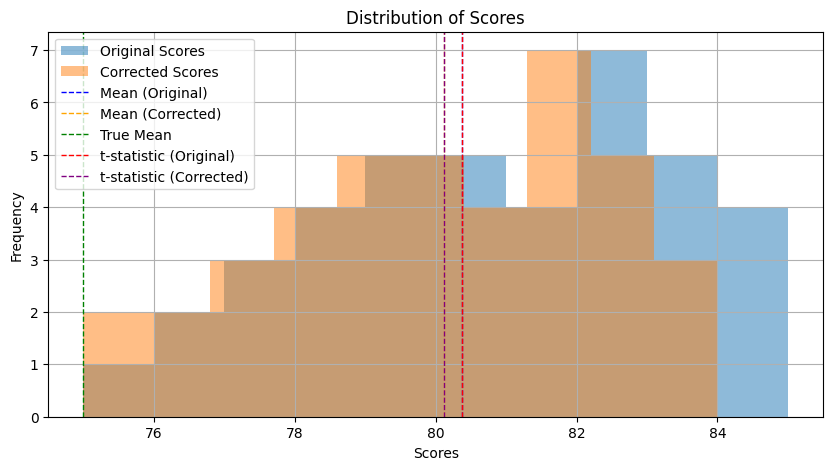

In [68]:
import matplotlib.pyplot as plt
# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(scores, bins=10, alpha=0.5, label='Original Scores')
plt.hist(scores_corrected, bins=10, alpha=0.5, label='Corrected Scores')
plt.axvline(np.mean(scores), color='blue', linestyle='dashed', linewidth=1, label='Mean (Original)')
plt.axvline(np.mean(scores_corrected), color='orange', linestyle='dashed', linewidth=1, label='Mean (Corrected)')
plt.axvline(true_mean, color='green', linestyle='dashed', linewidth=1, label='True Mean')
plt.axvline(true_mean + t_stat * np.std(scores, ddof=1) / np.sqrt(len(scores)), color='red', linestyle='dashed', linewidth=1, label='t-statistic (Original)')
plt.axvline(true_mean + t2 * np.std(scores_corrected, ddof=1) / np.sqrt(len(scores_corrected)), color='purple', linestyle='dashed', linewidth=1, label='t-statistic (Corrected)')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend()
plt.grid(True)
plt.show()